In [157]:
import torch
import matplotlib.pyplot as plt

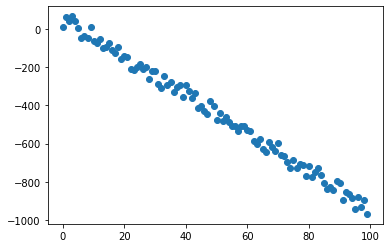

In [158]:
x = torch.arange(100)
y = (x * -10 + 5) + torch.rand(100) * 1e2
plt.scatter(x,y)

In [159]:
W = torch.rand(1, requires_grad = True, dtype=torch.float32)
b = torch.rand(1, requires_grad = True, dtype=torch.float32)

W, b

(tensor([0.9925], dtype=torch.float32, requires_grad=True),
 tensor([0.6870], dtype=torch.float32, requires_grad=True))

0 112.18354797363281
10 112.05978393554688
20 112.0534439086914
30 112.05126953125
40 112.04914855957031
50 112.04763793945312
60 112.04670715332031
70 112.04579162597656
80 112.04434204101562
90 112.04347229003906


(tensor([-8.9556], dtype=torch.float32, requires_grad=True),
 tensor([0.3160], dtype=torch.float32, requires_grad=True))

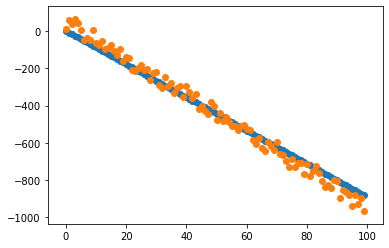

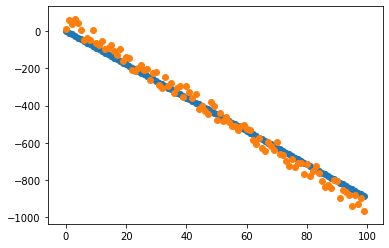

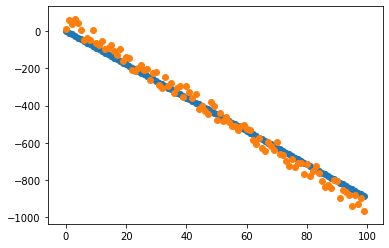

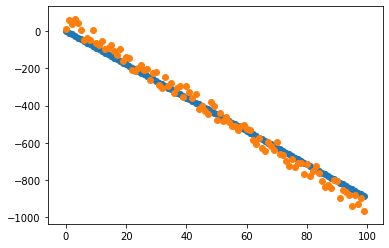

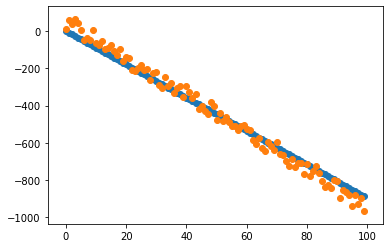

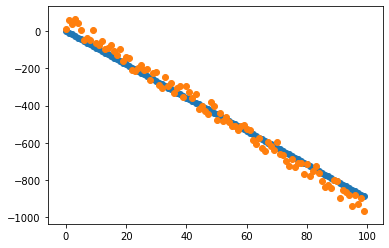

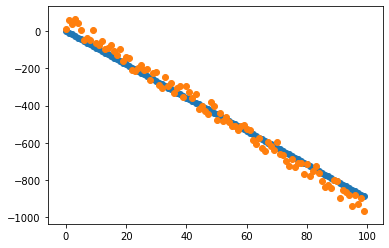

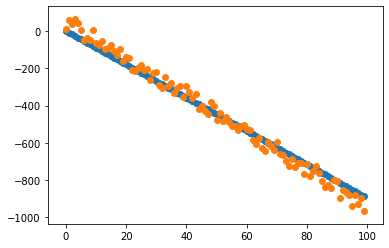

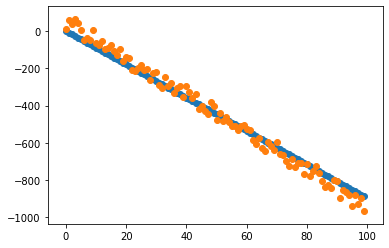

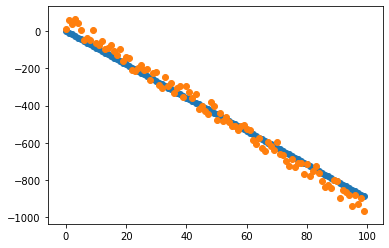

In [163]:
epochs = 100
lr = 1e-3
a = 0.5

for i in range(epochs):
    y_hat = x * W + b
    reg = W.pow(2)+b.pow(2) * a # regularization seems a bit off for this example
    loss = (y_hat-y).pow(2).sqrt().mean() + reg
    loss.backward()
    
    if i % 10 == 0:
        print(i, loss.item())
        plt.figure()
        plt.scatter(x, y_hat.detach().numpy())
        plt.scatter(x, y)
    
    
    with torch.no_grad():
        W -= lr * W.grad
        b -= lr * b.grad
        W.grad.zero_()
        b.grad.zero_()

W, b